In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data= pd.read_csv('F:/Social Prachar/Raj sir/capgemini task/modcloth.csv')
data

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99888,154797,BernMarie,5,2019-06-26 21:15:13.165000+00:00,6.0,Just right,Large,Small&Large,Dresses,NaN,2017,0
99889,77949,Sam,4,2019-06-26 23:22:29.633000+00:00,4.0,Slightly small,Small,Small&Large,Bottoms,NaN,2014,2
99890,67194,Janice,5,2019-06-27 00:20:52.125000+00:00,NaN,Just right,Small,Small&Large,Dresses,NaN,2013,2
99891,71607,amy,3,2019-06-27 15:45:06.250000+00:00,NaN,Slightly small,Small,Small&Large,Outerwear,Jack by BB Dakota,2016,2


In [3]:
data.isnull().sum()

item_id           0
user_id           1
rating            0
timestamp         0
size          21760
fit           18506
user_attr      8367
model_attr        0
category          0
brand         73980
year              0
split             0
dtype: int64

In [4]:
data=data.drop(['brand'],1)

In [5]:
data

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,2012,0
...,...,...,...,...,...,...,...,...,...,...,...
99888,154797,BernMarie,5,2019-06-26 21:15:13.165000+00:00,6.0,Just right,Large,Small&Large,Dresses,2017,0
99889,77949,Sam,4,2019-06-26 23:22:29.633000+00:00,4.0,Slightly small,Small,Small&Large,Bottoms,2014,2
99890,67194,Janice,5,2019-06-27 00:20:52.125000+00:00,NaN,Just right,Small,Small&Large,Dresses,2013,2
99891,71607,amy,3,2019-06-27 15:45:06.250000+00:00,NaN,Slightly small,Small,Small&Large,Outerwear,2016,2


In [6]:
data['fit'].value_counts()

Just right        55287
Slightly large    11114
Slightly small    10771
Very large         2177
Very small         2038
Name: fit, dtype: int64

In [7]:
data.describe()

,item_id,rating,size,year,split
count,99893.000000,99893.000000,78133.000000,99893.000000,99893.000000
mean,83944.091208,4.209594,3.217322,2015.476450,0.358564
std,43558.135979,1.080633,1.885934,1.970262,0.720993
min,6454.000000,1.000000,0.000000,2010.000000,0.000000
25%,48629.000000,4.000000,2.000000,2014.000000,0.000000
50%,77878.000000,5.000000,3.000000,2016.000000,0.000000
75%,120126.000000,5.000000,4.000000,2017.000000,0.000000
max,155950.000000,5.000000,8.000000,2019.000000,2.000000


In [8]:
data['size']=data['size'].fillna(3.217322)

In [9]:
data['fit']=data['fit'].fillna('Just right')

In [10]:
21760/99893

0.2178330813970949

In [11]:
8367/99  # filling null values for 'user_attr ' this variable becouse only 8 % missing value we can fill with 'Small' 

84.51515151515152

In [12]:
18506/99893 # filling null values for 'fit' this variable becouse only 18 % missing value we can fill with 'Just right' 

0.18525822630214328

In [13]:
73980/99893   # variable brand 74% missing value so we can drop this column 

0.7405924339042775

In [14]:
data['user_attr'].value_counts()

Small    73161
Large    18365
Name: user_attr, dtype: int64

In [15]:
data['user_attr']=data['user_attr'].fillna('Small ')

In [16]:
data.isnull().sum()

item_id       0
user_id       1
rating        0
timestamp     0
size          0
fit           0
user_attr     0
model_attr    0
category      0
year          0
split         0
dtype: int64

In [17]:
data['user_id'].value_counts()

Sarah            250
Amanda           204
jennifer         198
Laura            197
Jennifer         191
                ... 
macca7277          1
redbirdbrandi      1
hkittyyy           1
v_unruh            1
jmb815             1
Name: user_id, Length: 44783, dtype: int64

In [18]:
data=data.dropna()

In [19]:
data

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,3.217322,Just right,Small,Small,Dresses,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,3.217322,Just right,Small,Small,Dresses,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,3.217322,Just right,Small,Small,Dresses,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,3.217322,Just right,Small,Small,Dresses,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,3.217322,Just right,Small,Small,Dresses,2012,0
...,...,...,...,...,...,...,...,...,...,...,...
99888,154797,BernMarie,5,2019-06-26 21:15:13.165000+00:00,6.000000,Just right,Large,Small&Large,Dresses,2017,0
99889,77949,Sam,4,2019-06-26 23:22:29.633000+00:00,4.000000,Slightly small,Small,Small&Large,Bottoms,2014,2
99890,67194,Janice,5,2019-06-27 00:20:52.125000+00:00,3.217322,Just right,Small,Small&Large,Dresses,2013,2
99891,71607,amy,3,2019-06-27 15:45:06.250000+00:00,3.217322,Slightly small,Small,Small&Large,Outerwear,2016,2


In [20]:
data.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
size          0
fit           0
user_attr     0
model_attr    0
category      0
year          0
split         0
dtype: int64

<AxesSubplot:>

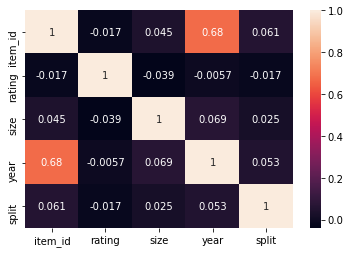

In [21]:
sns.heatmap(data.corr(),annot=True)

In [22]:
data.corr()

,item_id,rating,size,year,split
item_id,1.000000,-0.016544,0.044679,0.679161,0.060986
rating,-0.016544,1.000000,-0.039298,-0.005686,-0.016802
size,0.044679,-0.039298,1.000000,0.069112,0.025220
year,0.679161,-0.005686,0.069112,1.000000,0.053393
split,0.060986,-0.016802,0.025220,0.053393,1.000000


In [23]:
pd.get_dummies(data[["fit"]]).head()

,fit_Just right,fit_Slightly large,fit_Slightly small,fit_Very large,fit_Very small
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [24]:
pd.get_dummies(data[["user_attr"]]).head()

,user_attr_Large,user_attr_Small,user_attr_Small
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [25]:
pd.get_dummies(data[["model_attr"]]).head()

,model_attr_Small,model_attr_Small&Large
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [26]:
pd.get_dummies(data[["category"]]).head()

,category_Bottoms,category_Dresses,category_Outerwear,category_Tops
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [27]:
data_feature=pd.concat([pd.get_dummies(data[["fit"]]),pd.get_dummies(data[["user_attr"]]),pd.get_dummies(data[["model_attr"]]),pd.get_dummies(data[["category"]]),data['rating'],data['size'],data['year'],data['item_id']],axis=1)
data_feature.head()

,fit_Just right,fit_Slightly large,fit_Slightly small,fit_Very large,fit_Very small,user_attr_Large,user_attr_Small,user_attr_Small,model_attr_Small,model_attr_Small&Large,category_Bottoms,category_Dresses,category_Outerwear,category_Tops,rating,size,year,item_id
0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,4,3.217322,2012,7443
1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,3,3.217322,2012,7443
2,1,0,0,0,0,0,1,0,1,0,0,1,0,0,4,3.217322,2012,7443
3,1,0,0,0,0,0,0,1,1,0,0,1,0,0,4,3.217322,2012,7443
4,1,0,0,0,0,0,1,0,1,0,0,1,0,0,4,3.217322,2012,7443


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
min_max_scaler = MinMaxScaler()
data_feature = min_max_scaler.fit_transform(data_feature)

In [30]:
np.round(data_feature,2)

array([[1.  , 0.  , 0.  , ..., 0.4 , 0.22, 0.01],
       [1.  , 0.  , 0.  , ..., 0.4 , 0.22, 0.01],
       [1.  , 0.  , 0.  , ..., 0.4 , 0.22, 0.01],
       ...,
       [1.  , 0.  , 0.  , ..., 0.4 , 0.33, 0.41],
       [0.  , 0.  , 1.  , ..., 0.4 , 0.67, 0.44],
       [1.  , 0.  , 0.  , ..., 0.4 , 0.67, 0.76]])

# Using KNN algorithm to find our prediction

In [31]:
from sklearn.neighbors import NearestNeighbors

In [32]:
nbrs = NearestNeighbors(n_neighbors=6, algorithm='auto').fit(data_feature)

In [33]:
c

In [34]:
distances

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.02716525,
        0.02716525],
       [0.        , 0.        , 0.02716525, 0.02716525, 0.07479799,
        0.07479799]])

In [35]:
indices

array([[   42,   246,  2362,   493,    22,     2],
       [    1,  1277, 54230,    39,   262,    75],
       [   42,   246,  2362,   493,    22,     2],
       ...,
       [41489, 13300, 38680, 35845, 36515, 42196],
       [99890, 99803, 23950, 55331, 39934,  7838],
       [99891, 88429, 64972, 79188, 90434, 70488]], dtype=int64)

In [36]:
def get_index_from_name(name):
    return data[data["user_id"]==name].index.tolist()[0]

In [37]:
get_index_from_name('BernMarie')

99888

In [38]:
indices[99888][1:]

array([99888, 40363, 38062, 38224, 17875], dtype=int64)

In [39]:
data.iloc[indices[99888][1:],:]['user_id']

99889              Sam
40363           Miriam
38062           Cecily
38224          wrfrye1
17875    jesscarroll88
Name: user_id, dtype: object

In [40]:
def print_similar_names(user_id=None):
     if user_id:
        found_id = get_index_from_name(user_id)
        for id in indices[found_id][1:]:
            print(data.iloc[id]["user_id"],'[','User Attire =',data.iloc[id]["user_attr"],',','Category =',data.iloc[id]["category"],']')

In [42]:
print_similar_names(input('user_id=')) # prediction by user_id

user_id=sam
Dana [ User Attire = Small , Category = Tops ]
sam [ User Attire = Small , Category = Tops ]
kristen.goodpaster [ User Attire = Small , Category = Tops ]
meg.a.bee [ User Attire = Small , Category = Tops ]
Claire [ User Attire = Small , Category = Tops ]


In [43]:
data['user_attr'].value_counts()

Small     73160
Large     18365
Small      8367
Name: user_attr, dtype: int64

In [44]:
data['model_attr'].value_counts()

Small&Large    57031
Small          42861
Name: model_attr, dtype: int64

In [45]:
data['category'].value_counts()

Tops         34977
Dresses      34160
Bottoms      23624
Outerwear     7131
Name: category, dtype: int64